<a href="https://colab.research.google.com/github/vidya-2031/Financial_Analysis/blob/main/Financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving List of all companies in the world.csv to List of all companies in the world.csv


In [ ]:

# Replace the filename with the actual uploaded file name
df = pd.read_csv("List of all companies in the world.csv")

# Data Cleaning
df.dropna(subset=['marketcap'], inplace=True)
df['marketcap'] = pd.to_numeric(df['marketcap'], errors='coerce')
df = df.dropna()
df['price (USD)'] = pd.to_numeric(df['price (USD)'], errors='coerce')
df = df.dropna()
df.head()

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,3688676720640,245.55,United States
1,2,NVIDIA,NVDA,3292190474240,134.43,United States
2,3,Microsoft,MSFT,3034624819200,408.21,United States
3,4,Amazon,AMZN,2295249764352,216.58,United States
4,5,Alphabet (Google),GOOG,2199914283008,181.58,United States


In [ ]:

# Top 10 Companies by Market Capitalization
top_companies = df.sort_values(by='marketcap', ascending=False).head(10)
fig1 = px.bar(top_companies, x='Name', y='marketcap', color='country',
              title="Top 10 Companies by Market Capitalization",
              labels={'marketcap': 'Market Cap (USD)'})
fig1.show()

In [ ]:

# Top 10 Countries by Number of Companies
top_countries = df['country'].value_counts().nlargest(10).reset_index()
top_countries.columns = ['Country', 'Number of Companies']
fig2 = px.bar(top_countries, x='Country', y='Number of Companies',
              title='Top 10 Countries by Number of Companies',
              color='Number of Companies')
fig2.show()

In [ ]:

# Top 10 Countries by Total Market Cap
marketcap_by_country = df.groupby('country')['marketcap'].sum().nlargest(10).reset_index()
fig3 = px.pie(marketcap_by_country, names='country', values='marketcap',
              title='Top 10 Countries by Total Market Capitalization')
fig3.show()

In [ ]:

# Scatter Plot: Price vs Market Cap
fig4 = px.scatter(df, x='price (USD)', y='marketcap', color='country',
                  title='Price vs Market Cap of Companies',
                  hover_name='Name', log_y=True)
fig4.show()

In [ ]:

median_price = df.groupby('country')['price (USD)'].median().nlargest(10).reset_index()
fig5 = px.bar(median_price, x='country', y='price (USD)', color='price (USD)', title='Top 10 Countries by Median Stock Price')
fig5.show()

In [ ]:

correlation = df['marketcap'].corr(df['price (USD)'])
print(f"Correlation between Market Cap and Price: {correlation:.2f}")

Correlation between Market Cap and Price: 0.04


In [ ]:

high_price_companies = df[df['price (USD)'] > 1000].sort_values(by='price (USD)', ascending=False).head(10)
print("🔹 Top 10 Companies with Stock Price > $1000:")
high_price_companies[['Name', 'country', 'price (USD)', 'marketcap']]

🔹 Top 10 Companies with Stock Price > $1000:


,Name,country,price (USD),marketcap
8955,Eurofins-Cerep,France,21552.60,108711446
3275,Société Industrielle et Financière de l'Artois,France,13182.70,3537082737
720,Chocoladefabriken Lindt &amp; Sprüngli,Switzerland,12365.60,28134509798
3514,First National of Nebraska,United States,11900.00,3083706624
3658,Zuger Kantonalbank,Switzerland,9870.22,2838733564
2064,Lotus Bakeries,Belgium,9499.90,7769793379
4414,Boursa Kuwait Securities Company,Kuwait,9458.32,1899003724
5392,Humansoft Holding Company,Kuwait,8361.98,1121534505
966,NVR,United States,7094.80,20459628544
5058,Gulf Cable and Electrical Industries Company -...,Kuwait,6357.44,1322500941


In [ ]:

# Define undervalued: Price < $20 but market cap > $10B
undervalued = df[(df['price (USD)'] < 20) & (df['marketcap'] > 1e10)]
undervalued_sorted = undervalued.sort_values(by='marketcap', ascending=False).head(10)
print("🔹 Top 10 Undervalued Companies (Low Price, High Market Cap):")
undervalued_sorted[['Name', 'country', 'price (USD)', 'marketcap']]

🔹 Top 10 Undervalued Companies (Low Price, High Market Cap):


,Name,country,price (USD),marketcap
5,Saudi Aramco,Saudi Arabia,7.394550,1788321175304
31,ICBC,China,0.719499,320173267184
43,Agricultural Bank of China,China,0.714483,246253608113
50,China Mobile,China,10.618700,232933229938
55,China Construction Bank,China,1.191720,219678877625
65,Bank of China,China,0.753103,205546025666
71,PetroChina,China,0.776132,194833897890
75,Reliance Industries,India,14.183500,191936923087
91,Xiaomi,China,6.750000,163661168640
112,Mitsubishi UFJ Financial,Japan,12.640000,146469797888


In [ ]:

top5_countries = df['country'].value_counts().nlargest(5).index
df_top5 = df[df['country'].isin(top5_countries)]
fig6 = px.box(df_top5, x='country', y='price (USD)', log_y=True,
              title='Stock Price Distribution (Log Scale) in Top 5 Countries')
fig6.show()

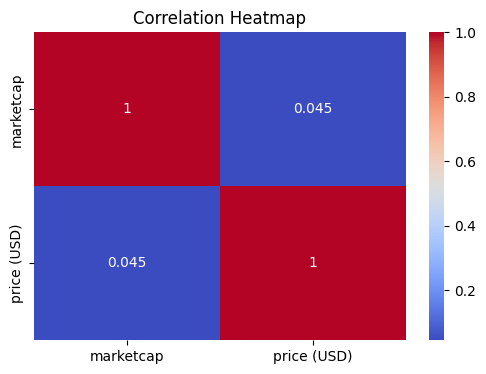

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_df = df[['marketcap', 'price (USD)']]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

df['price_to_marketcap'] = df['price (USD)'] / df['marketcap']
top_price_to_marketcap = df.sort_values(by='price_to_marketcap', ascending=False).head(10)
print("🔹 Companies with Highest Price-to-MarketCap Ratio (Potential Overvaluation):")
top_price_to_marketcap[['Name', 'country', 'price (USD)', 'marketcap', 'price_to_marketcap']]

🔹 Companies with Highest Price-to-MarketCap Ratio (Potential Overvaluation):


,Name,country,price (USD),marketcap,price_to_marketcap
8955,Eurofins-Cerep,France,21552.600,108711446,0.000198
9572,Kuwait Hotels Company K.S.C.P.,Kuwait,872.527,49239562,0.000018
9730,Dalqan Real Estate Company,Kuwait,561.178,33875237,0.000017
8750,Kuwait Foundry Company K.S.C.P.,Kuwait,2007.780,130506001,0.000015
7517,Hypothekarbank Lenzburg,Switzerland,4589.760,329627556,0.000014
8986,Brouwerij Handelsmaatschappij,Belgium,1412.430,105932203,0.000013
9943,Equipment Holding Company K.S.C.P.,Kuwait,217.645,17411612,0.000012
9538,Metal and Recycling Company K.S.C.,Kuwait,577.360,52013467,0.000011
7627,National Petroleum Services Company,Kuwait,3383.070,305626727,0.000011
7257,Kuwait National Cinema Company,Kuwait,4213.430,390172741,0.000011


In [ ]:

price_bins = [0, 10, 50, 100, 500, 1000, float('inf')]
price_labels = ['< $10', '$10–50', '$50–100', '$100–500', '$500–1000', '> $1000']
df['Price Range'] = pd.cut(df['price (USD)'], bins=price_bins, labels=price_labels)

price_range_counts = df['Price Range'].value_counts().sort_index().reset_index()
price_range_counts.columns = ['Price Range', 'Number of Companies']
fig7 = px.bar(price_range_counts, x='Price Range', y='Number of Companies',
              title='Company Count by Stock Price Range', color='Number of Companies')
fig7.show()

In [ ]:

top_countries_marketcap = df.groupby('country')['marketcap'].sum().nlargest(10).reset_index()
fig8 = px.treemap(top_countries_marketcap, path=['country'], values='marketcap',
                  title='Market Cap Share by Country (Top 10)')
fig8.show()

In [ ]:

price_mode = df['price (USD)'].mode().values[0]
print(f"🎯 Most Common Stock Price (Mode): ${price_mode:.2f}")

🎯 Most Common Stock Price (Mode): $1.40


In [ ]:

summary = df[['marketcap', 'price (USD)']].describe()
print("📊 Summary Statistics:")
summary

📊 Summary Statistics:


,marketcap,price (USD)
count,9.999000e+03,9999.000000
mean,1.159602e+10,69.539276
std,8.030599e+10,437.096541
min,1.396662e+07,0.000000
25%,3.332675e+08,3.096155
50%,1.376766e+09,11.930000
75%,5.695557e+09,37.490000
max,3.688677e+12,21552.600000


In [ ]:

df['price_to_mc_ratio'] = df['price (USD)'] / df['marketcap']
top_growth = df.sort_values(by='price_to_mc_ratio', ascending=False).head(10)
top_growth[['Name', 'price (USD)', 'marketcap', 'price_to_mc_ratio']]

,Name,price (USD),marketcap,price_to_mc_ratio
8955,Eurofins-Cerep,21552.600,108711446,0.000198
9572,Kuwait Hotels Company K.S.C.P.,872.527,49239562,0.000018
9730,Dalqan Real Estate Company,561.178,33875237,0.000017
8750,Kuwait Foundry Company K.S.C.P.,2007.780,130506001,0.000015
7517,Hypothekarbank Lenzburg,4589.760,329627556,0.000014
8986,Brouwerij Handelsmaatschappij,1412.430,105932203,0.000013
9943,Equipment Holding Company K.S.C.P.,217.645,17411612,0.000012
9538,Metal and Recycling Company K.S.C.,577.360,52013467,0.000011
7627,National Petroleum Services Company,3383.070,305626727,0.000011
7257,Kuwait National Cinema Company,4213.430,390172741,0.000011


In [ ]:

from IPython.display import display, HTML

# Filter risky stocks
risky = df[(df['price (USD)'] > 500) & (df['marketcap'] < 1e9)]
risky = risky.sort_values(by='price (USD)', ascending=False).head(10)

# Display title and table
display(HTML("<h3 style='color:crimson;'>Stocks that look risky (Price > $500 but Market Cap < $1B)</h3>"))
display(risky[['Name', 'country', 'price (USD)', 'marketcap']].style.format({
    'price (USD)': '${:,.2f}',
    'marketcap': '${:,.2f}'
}))

,Name,country,price (USD),marketcap
8955,Eurofins-Cerep,France,"$21,552.60","$108,711,446.00"
7517,Hypothekarbank Lenzburg,Switzerland,"$4,589.76","$329,627,556.00"
7257,Kuwait National Cinema Company,Kuwait,"$4,213.43","$390,172,741.00"
7227,Schweizerische Nationalbank,Switzerland,"$3,988.19","$398,819,139.00"
7627,National Petroleum Services Company,Kuwait,"$3,383.07","$305,626,727.00"
6279,Jazeera Airways,Kuwait,"$3,097.63","$681,479,079.00"
5667,Mezzan Holding Company,Kuwait,"$3,061.95","$952,423,484.00"
6878,Heisco (Heavy Engineering Industries and Shipbuilding Company),Kuwait,"$2,721.38","$490,500,681.00"
7819,Kuwait Portland Cement,Kuwait,"$2,653.26","$265,912,345.00"
6650,Al-Ahleia Insurance,Kuwait,"$2,594.88","$562,314,629.00"


In [ ]:

geo_mc = df.groupby('country')['marketcap'].sum().nlargest(8).reset_index()
fig9 = px.pie(geo_mc, names='country', values='marketcap',
              title='Top 8 Countries by Total Market Cap', hole=0.4)
fig9.show()

In [ ]:

from IPython.display import display, HTML

# Filter for possibly undervalued companies
value_stocks = df[(df['marketcap'] > 1e10) & (df['price (USD)'] < 5)]
value_stocks_sorted = value_stocks.sort_values(by='marketcap', ascending=False).head(10)

# Display title and styled table
display(HTML("<h3 style='color:green;'>Companies that are Possibly Undervalued (Price < $5 and Market Cap > $10B)</h3>"))
display(value_stocks_sorted[['Name', 'country', 'price (USD)', 'marketcap']].style.format({
    'price (USD)': '${:,.2f}',
    'marketcap': '${:,.2f}'
}))

,Name,country,price (USD),marketcap
31,ICBC,China,$0.72,"$320,173,267,184.00"
43,Agricultural Bank of China,China,$0.71,"$246,253,608,113.00"
55,China Construction Bank,China,$1.19,"$219,678,877,625.00"
65,Bank of China,China,$0.75,"$205,546,025,666.00"
71,PetroChina,China,$0.78,"$194,833,897,890.00"
149,CNOOC,China,$2.38,"$116,881,241,325.00"
167,China Telecom,China,$0.86,"$106,080,036,657.00"
184,TAQA,United Arab Emirates,$0.85,"$95,817,687,459.00"
186,China Yangtze Power,China,$3.83,"$93,822,883,346.00"
188,China Shenhua Energy,China,$4.88,"$92,865,434,024.00"


In [ ]:

df['Volatility Level'] = pd.cut(df['price (USD)'], bins=[0, 5, 50, 200, 1000, float('inf')],
                                labels=['Very Low', 'Low', 'Moderate', 'High', 'Extreme'])

volatility_counts = df['Volatility Level'].value_counts().sort_index().reset_index()
volatility_counts.columns = ['Volatility Level', 'Number of Companies']

fig10 = px.bar(volatility_counts, x='Volatility Level', y='Number of Companies',
               title='Stock Price Volatility Levels')
fig10.show()

In [ ]:

duplicate_names = df[df.duplicated(subset='Name', keep=False)]
duplicate_names = duplicate_names.sort_values('Name')
duplicate_names[['Name', 'country', 'price (USD)', 'marketcap']]

,Name,country,price (USD),marketcap
2566,Castellum,Sweden,11.02600,5429689698
9395,Castellum,United States,0.83720,64724936
4598,First Bancorp,United States,41.71000,1724600064
7738,First Bancorp,United States,25.38000,283126592
2335,Phoenix Group,United Kingdom,6.39212,6395313350
4311,Phoenix Group,United Arab Emirates,0.33000,1992778390


In [ ]:

import plotly.figure_factory as ff
import numpy as np

# Filter out invalid prices (zero or negative, since log scale can't handle those)
price_data = df['price (USD)']
price_data = price_data[price_data > 0]

# Apply log10 transformation for log scale visualization
log_prices = np.log10(price_data)

# Create interactive KDE plot
fig = ff.create_distplot(
    [log_prices],
    group_labels=['log10(Price in USD)'],
    show_hist=False,
    show_rug=False,
    colors=['purple']
)

fig.update_layout(
    title='Stock Price Distribution (Log Scale)',
    xaxis_title='log10(Price USD)',
    yaxis_title='Density',
    template='plotly_white'
)

fig.show()

In [ ]:

from IPython.display import display, HTML

# Calculate IQR and upper bound for outlier detection
q3 = df['marketcap'].quantile(0.75)
iqr = q3 - df['marketcap'].quantile(0.25)
upper_bound = q3 + 1.5 * iqr

# Filter top outliers based on market cap
outliers = df[df['marketcap'] > upper_bound].sort_values('marketcap', ascending=False).head(10)

# Display title and formatted table
display(HTML("<h3 style='color:darkblue;'>Extremely High Market Cap Companies (Outliers)</h3>"))
display(outliers[['Name', 'country', 'marketcap', 'price (USD)']].style.format({
    'marketcap': '${:,.2f}',
    'price (USD)': '${:,.2f}'
}))

,Name,country,marketcap,price (USD)
0,Apple,United States,"$3,688,676,720,640.00",$245.55
1,NVIDIA,United States,"$3,292,190,474,240.00",$134.43
2,Microsoft,United States,"$3,034,624,819,200.00",$408.21
3,Amazon,United States,"$2,295,249,764,352.00",$216.58
4,Alphabet (Google),United States,"$2,199,914,283,008.00",$181.58
5,Saudi Aramco,Saudi Arabia,"$1,788,321,175,304.00",$7.39
6,Meta Platforms (Facebook),United States,"$1,731,883,171,840.00",$683.55
7,Tesla,United States,"$1,086,540,414,976.00",$337.80
8,Berkshire Hathaway,United States,"$1,032,512,929,792.00",$478.74
9,TSMC,Taiwan,"$1,028,181,655,552.00",$198.24


In [ ]:

top8_countries = df['country'].value_counts().nlargest(8).index
boxplot_df = df[df['country'].isin(top8_countries)]

fig13 = px.box(boxplot_df, x='country', y='price (USD)', log_y=True,
               title='Stock Price Spread by Country (Top 8)')
fig13.show()

In [ ]:

invalid_mc = df[df['marketcap'].isna() | (df['marketcap'] <= 0)]
print(f"🔎 Companies with missing/invalid market cap: {len(invalid_mc)}")
invalid_mc[['Name', 'country', 'price (USD)', 'marketcap']]

🔎 Companies with missing/invalid market cap: 0


,Name,country,price (USD),marketcap


In [ ]:

# Assuming 'marketcap' or 'price (USD)' = 0 indicates inactive or incorrect entry
inactive = df[(df['marketcap'] == 0) | (df['price (USD)'] == 0)]
print(f"⚠️ Potentially Inactive Companies: {len(inactive)}")
inactive[['Name', 'country', 'price (USD)', 'marketcap']].head()

⚠️ Potentially Inactive Companies: 2


,Name,country,price (USD),marketcap
1580,Ahli United Bank,Bahrain,0.0,10861061648
2976,Aluminium Bahrain (Alba),Bahrain,0.0,4240775153


In [ ]:

penny_stocks = df[df['price (USD)'] < 1].sort_values(by='marketcap', ascending=False)
penny_stocks[['Name', 'country', 'price (USD)', 'marketcap']].head(10)

,Name,country,price (USD),marketcap
31,ICBC,China,0.719499,320173267184
43,Agricultural Bank of China,China,0.714483,246253608113
65,Bank of China,China,0.753103,205546025666
71,PetroChina,China,0.776132,194833897890
167,China Telecom,China,0.864943,106080036657
184,TAQA,United Arab Emirates,0.850000,95817687459
191,Sinopec,China,0.815172,92385122940
231,NTT (Nippon Telegraph &amp; Telephone),Japan,0.988372,82032176193
270,ADNOC Gas,United Arab Emirates,0.940000,72513459590
279,Postal Savings Bank of China,China,0.737931,71197284423


In [ ]:

from IPython.display import display, HTML

# Filter and sort for cheap but high market cap companies
cheap_billion_dollar = df[(df['marketcap'] > 1e9)].sort_values(by='price (USD)').head(10)

# Display title and formatted table
display(HTML("<h3 style='color:teal;'>Top 10 Cheapest Billion-Dollar Companies (Low Price, High Marketcap)</h3>"))
display(cheap_billion_dollar[['Name', 'country', 'price (USD)', 'marketcap']].style.format({
    'price (USD)': '${:,.2f}',
    'marketcap': '${:,.2f}'
}))

,Name,country,price (USD),marketcap
2976,Aluminium Bahrain (Alba),Bahrain,$0.00,"$4,240,775,153.00"
1580,Ahli United Bank,Bahrain,$0.00,"$10,861,061,648.00"
2614,GoTo,Indonesia,$0.00,"$5,289,275,693.00"
5316,Pakuwon Jati Tbk,Indonesia,$0.02,"$1,164,103,215.00"
4752,Ferrum S.A. de Cerámica y Metalurgia,Argentina,$0.03,"$1,583,031,447.00"
3022,Sampoerna,Indonesia,$0.04,"$4,138,922,719.00"
4483,Sarana Menara Nusantara,Indonesia,$0.04,"$1,826,493,048.00"
3958,Elang Mahkota Teknologi,Indonesia,$0.04,"$2,410,475,515.00"
4965,Country Garden,China,$0.05,"$1,404,954,676.00"
2741,Barito Pacific,Indonesia,$0.05,"$4,886,451,649.00"


In [ ]:

from IPython.display import display, HTML

# Compute Market Cap to Price ratio
df['mc_to_price'] = df['marketcap'] / df['price (USD)']

# Filter and sort top 10 based on mc_to_price ratio
top_mc_to_price = df[df['price (USD)'] > 0].sort_values(by='mc_to_price', ascending=False).head(10)

# Display title and formatted table
display(HTML("<h3 style='color:indigo;'>Market Cap to Price Ratio (Helps Identify Large Base Investors)</h3>"))
display(top_mc_to_price[['Name', 'marketcap', 'price (USD)', 'mc_to_price']].style.format({
    'marketcap': '${:,.2f}',
    'price (USD)': '${:,.2f}',
    'mc_to_price': '{:,.2f}'
}))

,Name,marketcap,price (USD),mc_to_price
2614,GoTo,"$5,289,275,693.00",$0.00,"1,077,688,925,586.49"
31,ICBC,"$320,173,267,184.00",$0.72,"444,994,735,481.22"
43,Agricultural Bank of China,"$246,253,608,113.00",$0.71,"344,659,856,305.89"
65,Bank of China,"$205,546,025,666.00",$0.75,"272,932,156,246.89"
626,Invest Bank,"$32,245,546,168.00",$0.12,"268,712,884,733.33"
71,PetroChina,"$194,833,897,890.00",$0.78,"251,031,909,378.82"
5,Saudi Aramco,"$1,788,321,175,304.00",$7.39,"241,843,137,892.64"
55,China Construction Bank,"$219,678,877,625.00",$1.19,"184,337,661,216.56"
6521,Atos,"$599,409,081.00",$0.00,"179,036,039,940.50"
565,Bank Rakyat Indonesia,"$35,952,429,332.00",$0.24,"150,649,190,580.35"
